# <center>Time Series Data</center>

## What is Time Series Data

**Time series data** is data that reflects either time or dates. In Pandas this type of data is known as datetime. If you are working with time series data, as we shall see, there are significant reasons to ensure that Pandas understands that the data at hand is a date or a time. It allows for easily manipulation and cleaning of inconsistent data formatting. Let us consider a simple example. Imagine we were given dates from one source as 01/02/2002 and another as 01.02.2002. Both are valid date formats, but they are structured entirely differently. Imagine now you had a third dataset that organized the data as 2 January 2002. Your task is to merge all these datasets together.

If you wanted to do that, you could write out some Python and script them into alignment, but Pandas offers the ability to do that automatically. In order to leverage that ability, however, you must tell Pandas that the data at hand is datetime data. Exactly how you do that, we will learn in this chapter.

Time series data is important for many different aspects of industry and academia. In the financial sector, time series data allows for one to understand the past performance of a stock. This is particularly useful in machine learning predictions which need to understand the past to predict accurately the future. More importantly, they need to understand the past a sequence of data. In the humanities, time series data is important for understand historical context and, as we shall see, plotting data temporally. Understanding how to work with time series data, therefore, in Pandas is absolutely essential.

## About the Dataset

In this chapter, we will be working with an early version of a dataset I helped cultivate at the *Bitter Aloe Project*, a digital humanities project that explores apartheid violence in South Africa during the 20th century. This dataset comes from Vol. 7 of the Truth and Reconciliation Commission's *Final Report*. I am using not our final, well-cleaned version of this dataset, rather an earlier version for one key reason. It contains problematic cells and structure. This is more reflective of real-world data, which will often times come from multiple sources and need to be cleaned and structured. As such, it is good practice in this chapter to try and address some of the common problems that you will encounter with time series data.

In [1]:
import pandas as pd
df = pd.read_csv("data/trc.csv")
df

,ObjectId,Last,First,Description,Place,Yr,Homeland,Province,Long,Lat,HRV,ORG
0,1,AARON,Thabo Simon,An ANCYL member who was shot and severely inju...,Bethulie,1991.0,NaN,Orange Free State,25.97552,-30.503290,shoot|injure,ANC|ANCYL|Police|SAP
1,2,ABBOTT,Montaigne,A member of the SADF who was severely injured ...,Messina,1987.0,NaN,Transvaal,30.039597,-22.351308,injure,SADF
2,3,ABRAHAM,Nzaliseko Christopher,A COSAS supporter who was kicked and beaten wi...,Mdantsane,1985.0,Ciskei,Cape of Good Hope,27.6708791,-32.958623,beat,COSAS|Police
3,4,ABRAHAMS,Achmat Fardiel,Was shot and blinded in one eye by members of ...,Athlone,1985.0,NaN,Cape of Good Hope,18.50214,-33.967220,shoot|blind,SAP
4,5,ABRAHAMS,Annalene Mildred,Was shot and injured by members of the SAP in ...,Robertson,1990.0,NaN,Cape of Good Hope,19.883611,-33.802220,shoot|injure,Police|SAP
...,...,...,...,...,...,...,...,...,...,...,...,...
20829,20888,XUZA,Mandla,Was severely injured when he was stoned by a f...,Carletonville,1991.0,NaN,Transvaal,27.397673,-26.360943,injure|stone,ANC
20830,20889,YAKA,Mbangomuni,An IFP supporter and acting induna who was sho...,Mvutshini,1993.0,KwaZulu,Natal,30.28172,-30.868900,shoot,NaN
20831,20890,YALI,Khayalethu,"Was shot by members of the SAP in Lingelihle, ...",Cradock,1986.0,NaN,Cape of Good Hope,25.619176,-32.164221,shoot,SAP
20832,20891,YALO,Bikiwe,An IFP supporter whose house and possessions w...,Port Shepstone,1994.0,NaN,Natal,30.4297304,-30.752126,destroy,ANC


As we can see, we have a few different columns which are relatively straight forward. In this notebook, however, I want to focus on Yr, which is a column that contains a single year referenced within the description. This corresponds to the year in which the violence described occurred. Notice, however, that we have a problem. Year is being recognized as a float (a number with a decimal place), or floating number. To confirm our suspicion, let's take a look at the data types by using the following command.

In [2]:
display(df.dtypes)

ObjectId         int64
Last            object
First           object
Description     object
Place           object
Yr             float64
Homeland        object
Province        object
Long            object
Lat            float64
HRV             object
ORG             object
dtype: object

Here, we can see all the different columns and their corresponding data types. Notice that Yr has float64. This confirms our suspicion. Why is this a problem? Well, if we were to try and plot the data by year (see the bar graph below), we would have floating numbers in that graph. This does not look clean. We could manually adjust these years to have no decimal place, but that requires effort on a case-by-case basis. Instead, it is best practice to convert these floats either to integers or to datetime data. Both have their advantages, but if your end goal is larger data analysis on time series data (not just plotting the years), I would opt for the latter. In order to do either, however, we must clean the data to get it into the correct format.

<AxesSubplot:>

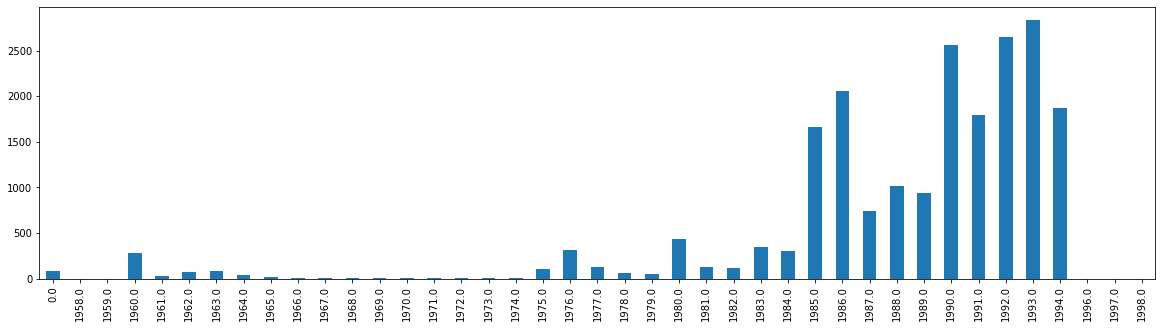

In [3]:
df['Yr'].value_counts().sort_index().plot.bar(figsize=(20,5))

## Cleaning the Data from Float to Int

Let's first try and convert our float column into an integer column. If we execute the command below which would normally achieve this task, we get the following error.

In [4]:
df['Yr'] = df['Yr'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

At the very bottom, we see why the error was returned. "IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer". This means that somewhere in our data, there are a few blank cells in the Year column. We need to fill in these blank cells. To do that, we can use the fillna function that we met earlier in this textbook.

In [5]:
df = df.fillna(0)

If we try and rerun our same command as above, you will notice we have no errors.

In [6]:
df['Yr'] = df['Yr'].astype(int)

Now, let's see if it worked by displaying the data types again.

In [7]:
display(df.dtypes)

ObjectId         int64
Last            object
First           object
Description     object
Place           object
Yr               int32
Homeland        object
Province        object
Long            object
Lat            float64
HRV             object
ORG             object
dtype: object

Notice that Yr is now int32. Success! Now that we have the data in the correct format, let's plot it out. We can plot out the frequency of violence based on year by using value counts. This will go through the entire Yr column and count all the values identified and store them as a dictionary of frequencies.

In [8]:
df['Yr'].value_counts()

1993    2835
1992    2648
1990    2556
1986    2056
1994    1867
1991    1793
1985    1665
1988    1015
1989     935
1987     744
1980     438
1983     352
1976     319
1984     301
1960     280
1977     128
1981     124
1982     123
1975     111
1963      88
0         84
1962      69
1978      60
1979      53
1964      37
1961      32
1965      19
1969      14
1968      14
1974      12
1966      11
1970      10
1971      10
1967       8
1972       6
1973       5
1959       3
1998       3
1996       3
1997       2
1958       1
Name: Yr, dtype: int64

This looks great, but let's try and plot it.

<AxesSubplot:>

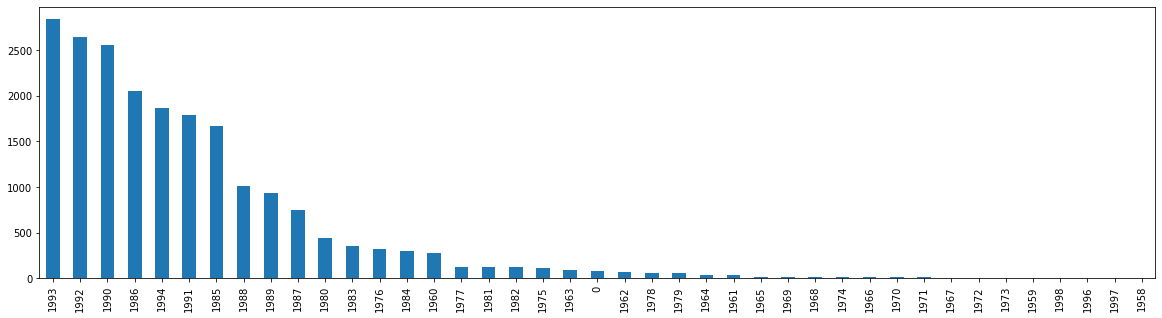

In [9]:
df['Yr'].value_counts().plot.bar(figsize=(20,5))

What do you notice that is horribly wrong about our bar graph? If you noticed that it is not chronological, you'd be right. It would be quite odd to present our data in this format. When we are examining time series data, we need to visualize that data chronologically (usually). We can fix this, by adding sort_index().

In [10]:
df['Yr'].value_counts().sort_index()

0         84
1958       1
1959       3
1960     280
1961      32
1962      69
1963      88
1964      37
1965      19
1966      11
1967       8
1968      14
1969      14
1970      10
1971      10
1972       6
1973       5
1974      12
1975     111
1976     319
1977     128
1978      60
1979      53
1980     438
1981     124
1982     123
1983     352
1984     301
1985    1665
1986    2056
1987     744
1988    1015
1989     935
1990    2556
1991    1793
1992    2648
1993    2835
1994    1867
1996       3
1997       2
1998       3
Name: Yr, dtype: int64

Notice that we have now preserved the value counts, but organized them in their correct order. We can now try plotting that data.

<AxesSubplot:>

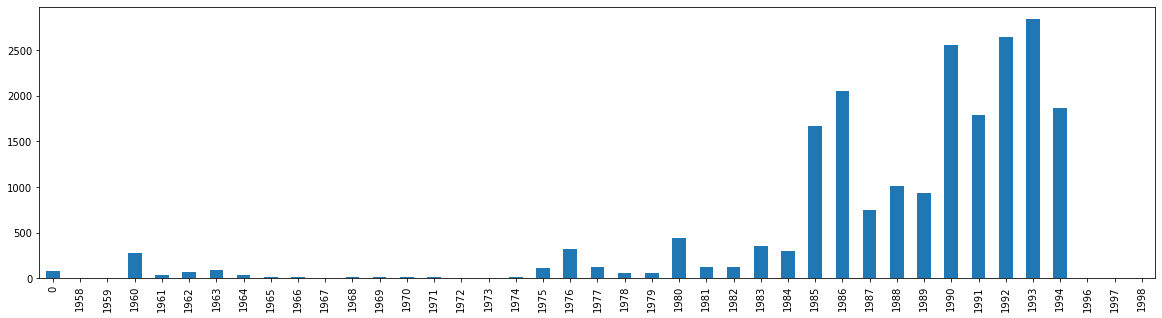

In [11]:
df['Yr'].value_counts().sort_index().plot.bar(figsize=(20,5))

We have a potential issue, however. That first row, 0, is throwing off our bar graph. What if I didn't want to represent 0, or no date, in the graph. I can solve this problem a few different ways. Let's first create a new dataframe called val_year.

In [12]:
val_year = df["Yr"].value_counts().sort_index()
val_year

0         84
1958       1
1959       3
1960     280
1961      32
1962      69
1963      88
1964      37
1965      19
1966      11
1967       8
1968      14
1969      14
1970      10
1971      10
1972       6
1973       5
1974      12
1975     111
1976     319
1977     128
1978      60
1979      53
1980     438
1981     124
1982     123
1983     352
1984     301
1985    1665
1986    2056
1987     744
1988    1015
1989     935
1990    2556
1991    1793
1992    2648
1993    2835
1994    1867
1996       3
1997       2
1998       3
Name: Yr, dtype: int64

With this new dataframe, I can simply start at index 1 and then graph the data. Notice that the 0 value is now gone.

<AxesSubplot:>

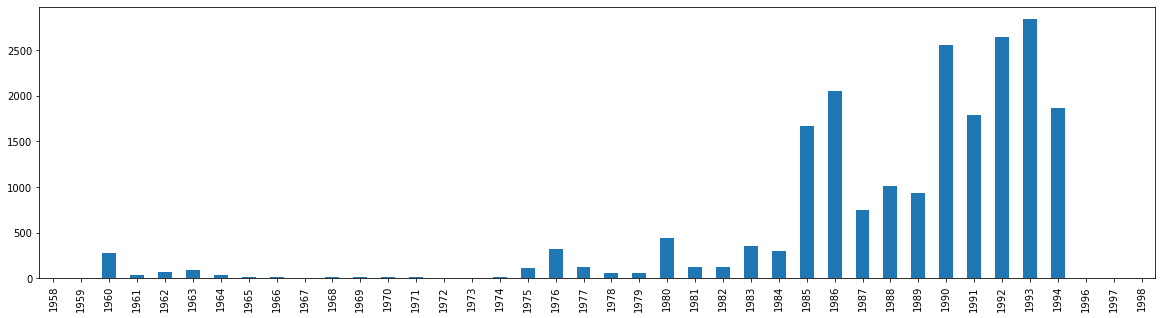

In [13]:
val_year.iloc[1:].plot.bar(figsize=(20,5))

Although we have been able to now plot our time series data chronologically, Pandas has not seen this as a datetime type. Instead, it has viewed these years solely as integers. In order to work with the years as time series data formally, we need to convert the integers into datetime format.

## Convert to Time Series DateTime in Pandas

Our goal here will be to create a new column that will store Yr as a datetime type. One might think that we could easily just convert everything to datetime. Normally the following command would work, but instead we get this error.

In [14]:
df['Dates'] = pd.to_datetime(df['Yr'], format='%Y')

ValueError: time data '0' does not match format '%Y' (match)

Just as the NaN cells plagued us above, so too has the 0s that we filled them with. Fortunately, we can fix this issue by passing the keyword argument errors="coerce".

In [15]:
df['Dates'] = pd.to_datetime(df['Yr'], format='%Y', errors="coerce")

In [16]:
display(df.dtypes)

ObjectId                int64
Last                   object
First                  object
Description            object
Place                  object
Yr                      int32
Homeland               object
Province               object
Long                   object
Lat                   float64
HRV                    object
ORG                    object
Dates          datetime64[ns]
dtype: object

And like magic, we have not only created a new column, but notice that it is in datetime64[ns] format. We should also understand the keyword argument passed here, format. Format takes a formatted string that will tell Pandas how to interpret the data being passed to it. Because our integer referred to a single year, we use %Y. Let's try and plot this data now to see how it looks.

<AxesSubplot:>

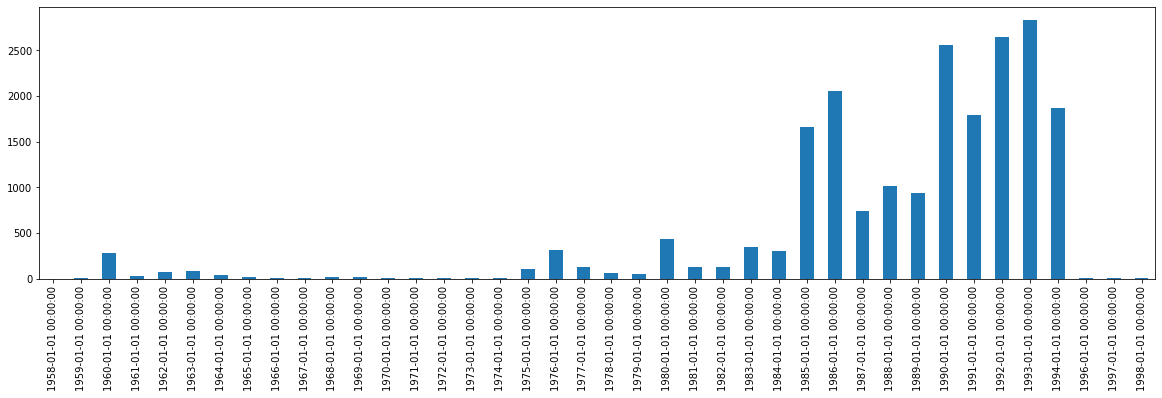

In [17]:
df['Dates'].value_counts().sort_index().plot.bar(figsize=(20,5))

While this data is now plotted as Pandas-structured time series data, it does not look good. Our dates are rendered in the long, full format that has both the date (in its entirety) and the time. Let's fix this by first, extracting the relevant data. In this case, the year and the counts.

In [18]:
new_df = df['Dates'].value_counts().sort_index()
new_df

1958-01-01       1
1959-01-01       3
1960-01-01     280
1961-01-01      32
1962-01-01      69
1963-01-01      88
1964-01-01      37
1965-01-01      19
1966-01-01      11
1967-01-01       8
1968-01-01      14
1969-01-01      14
1970-01-01      10
1971-01-01      10
1972-01-01       6
1973-01-01       5
1974-01-01      12
1975-01-01     111
1976-01-01     319
1977-01-01     128
1978-01-01      60
1979-01-01      53
1980-01-01     438
1981-01-01     124
1982-01-01     123
1983-01-01     352
1984-01-01     301
1985-01-01    1665
1986-01-01    2056
1987-01-01     744
1988-01-01    1015
1989-01-01     935
1990-01-01    2556
1991-01-01    1793
1992-01-01    2648
1993-01-01    2835
1994-01-01    1867
1996-01-01       3
1997-01-01       2
1998-01-01       3
Name: Dates, dtype: int64

Next, we need to convert that data into a new DataFrame.

In [19]:
new_df = pd.DataFrame(new_df)
new_df.head()

,Dates
1958-01-01,1
1959-01-01,3
1960-01-01,280
1961-01-01,32
1962-01-01,69


Now that we have that new DataFrame created, let's fix our column name and change Dates to ViolentActs.

In [20]:
new_df = new_df.rename(columns={"Dates": "ViolentActs"})
new_df.head()

,ViolentActs
1958-01-01,1
1959-01-01,3
1960-01-01,280
1961-01-01,32
1962-01-01,69


With the new DataFrame, we can also fix the index so that it is strictly the year. Because Pandas knows that the index is a datetime type, then we can use the extra method, year, to grab just the year.

In [21]:
new_df.index = new_df.index.year
new_df.head()

,ViolentActs
1958,1
1959,3
1960,280
1961,32
1962,69


Notice that our data is now just the year, the only piece of data in the time series data that matters to us. With that new DataFrame in the correct format, we can now plot it.

<AxesSubplot:>

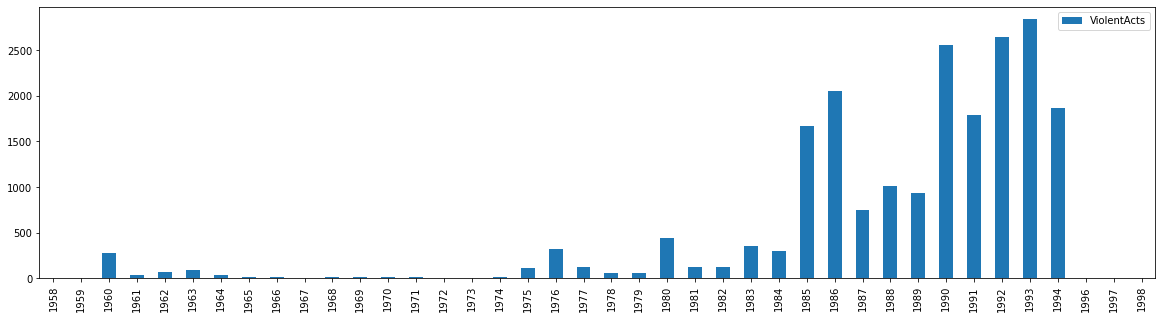

In [22]:
new_df.plot.bar(figsize=(20,5))

And thus we have successfully plotted our datetime data after properly formatting it in Pandas. While working with time series data in Pandas as a datetime can be a bit more complex in the beginning, it allows for you to more advanced things, such as we saw above by calling the year with .year. As we will see in the next few chapters, there are other advantages as well.